![](https://logos-download.com/wp-content/uploads/2016/11/Y_Combinator_logo_text_wordmark.png)

# Predict companies' performance - Part 1/2

[Y-Combinator](https://www.ycombinator.com/) is one of the most famous incubator in the world. A lot of enormous licorn like: 
 
* [Dropbox](https://www.dropbox.com/) 
* [Airbnb](https://www.airbnb.com/) 
* [Coinbase](https://www.coinbase.com/) 
* [Stripe](https://stripe.com/) 
* [Zapier](https://zapier.com/)

One thing that would really be of interest for them is to know what are the factors that drive success. Therefore, YC would like to know whether spendings has an influence on a company's profit. 


* Import `Marketing_Spending.csv` dataset and try to create a simple linear regression model using the template and predict a company's profit based on its marketing spendings. 

## Step 1 - Import Data 🤹‍♀️

- Import usual librairies

In [79]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer



# from sklearn.model_selection import train_test_split
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
# from sklearn.compose import ColumnTransformer

- Import `Maketing_Spending.csv` dataset

In [80]:
df = pd.read_csv("../99-assets/ML/Marketing_Spending.csv")
df.head()

,Marketing Spending,Profit
0,165349.20,192261.83
1,162597.70,191792.06
2,153441.51,191050.39
3,144372.41,182901.99
4,142107.34,166187.94


## Step 2 - EDA 📊

- Plot the relationship between Profit and Marketing spending

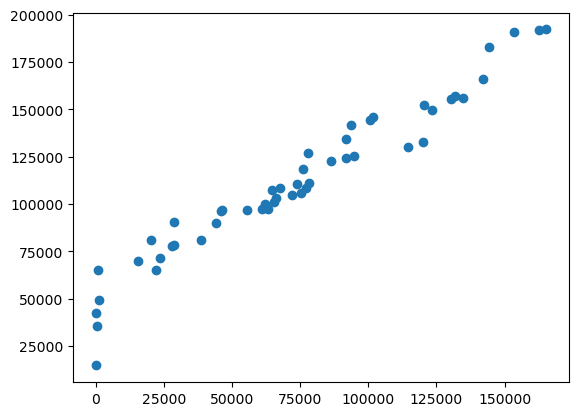

In [81]:
fig, ax = plt.subplots()
ax.scatter(df["Marketing Spending"], df["Profit"])

Text(0.5, 1.0, 'Profit vs Mktg spendings')

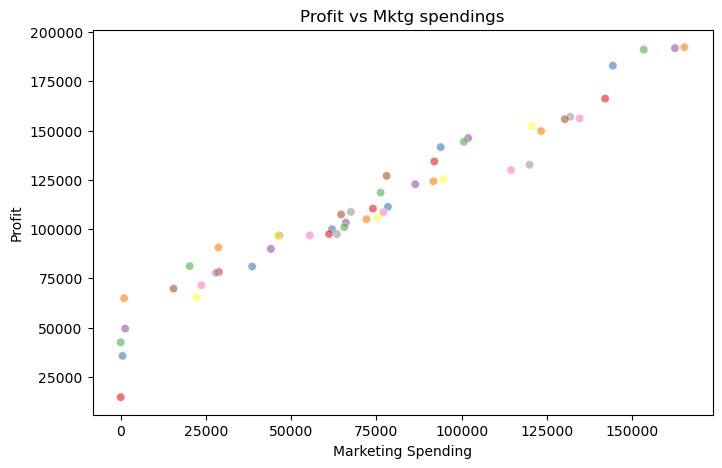

In [82]:
plt.figure(figsize=(8, 5))
sns.scatterplot (data=df, x='Marketing Spending', y='Profit', palette="Set1", hue='Profit', alpha=.6, legend=False)
plt.title("Profit vs Mktg spendings")
# plt.show()

* Show your dataset's main statistics

In [83]:
df.describe(include="all")

,Marketing Spending,Profit
count,50.000000,50.000000
mean,73721.615600,112012.639200
std,45902.256482,40306.180338
min,0.000000,14681.400000
25%,39936.370000,90138.902500
50%,73051.080000,107978.190000
75%,101602.800000,139765.977500
max,165349.200000,192261.830000


* Check if you see missing values 

In [84]:
# Marketing Spending    False
# Profit                False
df.isna().sum() / len(df) * 100




Marketing Spending    0.0
Profit                0.0
dtype: float64

In [85]:
df.isnull().any()


Marketing Spending    False
Profit                False
dtype: bool

## Step 3 - Preprocessing 🍳

- Split the dataset in $X$ and $y$ variables

In [86]:
# X il attend une matrice 2D
# y il attend un vecteur 1D

feature_list = ["Marketing Spending"] 
X = df.loc[:, feature_list]
y = df.loc[:, "Profit"]

print (X.shape)
print (y.shape)

print(X)
print(type(X))

print(y)
print(type(y))

(50, 1)
(50,)
    Marketing Spending
0            165349.20
1            162597.70
2            153441.51
3            144372.41
4            142107.34
5            131876.90
6            134615.46
7            130298.13
8            120542.52
9            123334.88
10           101913.08
11           100671.96
12            93863.75
13            91992.39
14           119943.24
15           114523.61
16            78013.11
17            94657.16
18            91749.16
19            86419.70
20            76253.86
21            78389.47
22            73994.56
23            67532.53
24            77044.01
25            64664.71
26            75328.87
27            72107.60
28            66051.52
29            65605.48
30            61994.48
31            61136.38
32            63408.86
33            55493.95
34            46426.07
35            46014.02
36            28663.76
37            44069.95
38            20229.59
39            38558.51
40            28754.33
41            27892.

- Split your data in train and test sets

In [87]:
# pas de stratify !
# stratify = y          # Allows you to stratify your sample. 
                        # Meaning, you will have the same
                        # proportion of categories in test 
                        # and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)  # donne une valeur pour être sûr d'avoir toujours le même comportement random


* Normalize $X_{train}$

In [88]:
print(X_train[:5])
print()

numeric_features = [0]
numeric_transformer = StandardScaler()                              # moyenne 0 et ecart type à 1

featureencoder = ColumnTransformer(                                 # ColumnTransformer provient du module compose
    transformers=[("num", numeric_transformer, numeric_features)]
)

X_train = featureencoder.fit_transform(X_train)                     # ! X doit être une matrice
print(X_train[:5], "\n\n", type(X_train), X_train.shape)
print(y_train[:5], "\n\n", type(y_train), y_train.shape)

    Marketing Spending
33            55493.95
35            46014.02
26            75328.87
34            46426.07
18            91749.16

[[-0.35006454]
 [-0.55530319]
 [ 0.07935762]
 [-0.54638238]
 [ 0.43485371]] 

 <class 'numpy.ndarray'> (40, 1)
33     96778.92
35     96479.51
26    105733.54
34     96712.80
18    124266.90
Name: Profit, dtype: float64 

 <class 'pandas.core.series.Series'> (40,)


## Build your model 🏋️‍♂️

- Load and fit the model !

In [89]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)         # This steps is the actual training !

LinearRegression()

- Use your model to make predictions on train set

[ 95676.21073667  87602.88620742 112568.08084243  87953.79738211
 126551.97418703]


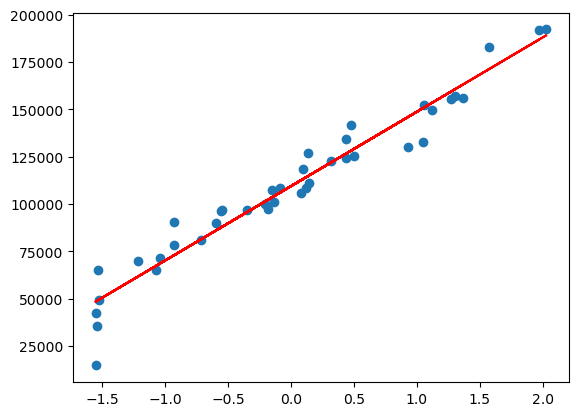

In [90]:
y_train_pred = regressor.predict(X_train)

fig, ax = plt.subplots()
ax.scatter(X_train, y_train)
ax.plot(X_train, y_train_pred, c="red")

print(y_train_pred[:5])

Text(0.5, 0, 'Mktg Expenses')

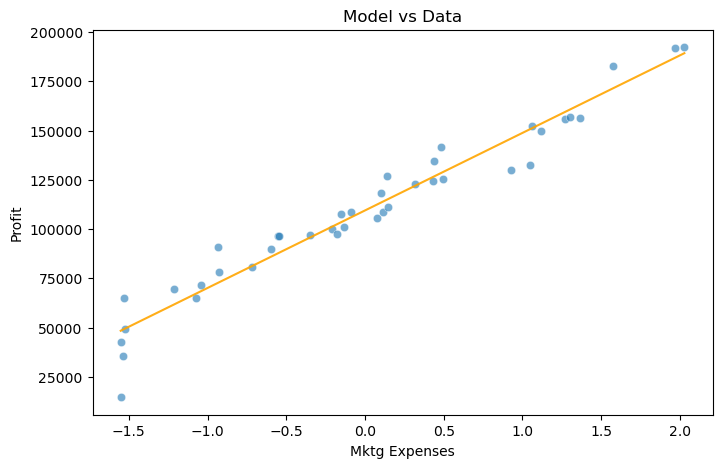

In [91]:
# X_train est devenu un ndarray
# y_train est une série

plt.figure(figsize=(8, 5))
sns.scatterplot (x=X_train[:,0], y=y_train, alpha=.6)
sns.lineplot (x=X_train[:,0], y=y_train_pred, alpha=.9, color="orange")

plt.title("Model vs Data")
plt.xlabel("Training : Mktg Expenses")


- Now use your model to make predictions on test set (make sure you apply the same pre-processing pipeline)

In [92]:
print(X_test[:5])
print()

X_test = featureencoder.transform(X_test)  # ! transform PAS transform fit 
print(X_test[:5])

y_test_pred = regressor.predict(X_test)
print(y_test_pred[:5])

    Marketing Spending
28            66051.52
11           100671.96
10           101913.08
41            27892.92
2            153441.51

[[-0.1214952 ]
 [ 0.6280306 ]
 [ 0.65490061]
 [-0.94762148]
 [ 1.77048111]]
[104667.27805998 134150.83410578 135207.80019517  72170.54428856
 179090.58602508]


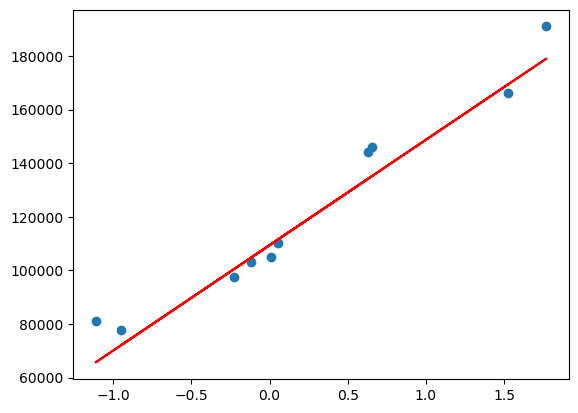

In [93]:
fig, ax = plt.subplots()
_ = ax.scatter(X_test, y_test)
_ = ax.plot(X_test, y_test_pred, c="red")


Text(0.5, 0, 'Mktg Expenses')

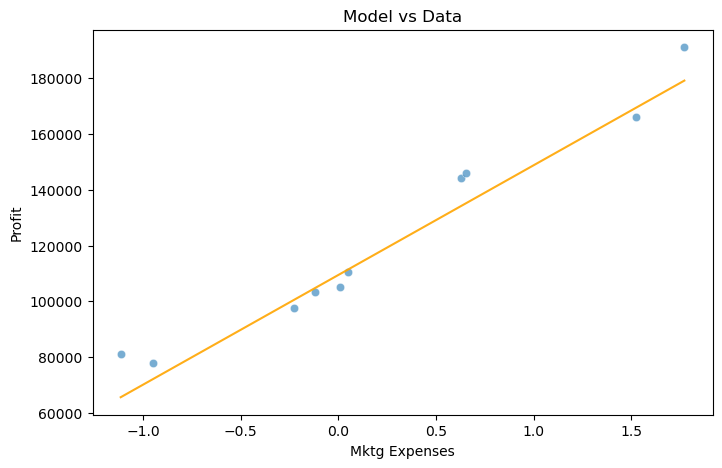

In [94]:
# X_train est devenu un ndarray
# y_train est une série

plt.figure(figsize=(8, 5))
sns.scatterplot (x=X_test[:,0], y=y_test, alpha=.6)
sns.lineplot (x=X_test[:,0], y=y_test_pred, alpha=.9, color="orange")

plt.title("Testing : Model vs Data")
plt.xlabel("Mktg Expenses")


### Prédiction avec une valeur de budget particulière

In [46]:
test = {
  "Marketing Spending" : [200000]
}
My_test = pd.DataFrame(test)
My_test = featureencoder.transform(My_test)  # ! pas oublier les transform
y_test_pred = regressor.predict(My_test)
print(y_test_pred)


[218740.85763697]


- Compare your train and test scores of your model

In [ ]:
# C'est bien X_train et y_train. 
# score() n'a pas besoin de y_train_pred car il peut les recalculer 
# Il a déjà en mémoire les 'a' et 'b' dont il a besoin 
print("R2 score on training set : ", regressor.score(X_train, y_train)) 
print("R2 score on test set     : ", regressor.score(X_test, y_test))

R2 score on training set :  0.9449589778363044
R2 score on test set     :  0.9464587607787219


- What can you say about these scores ?

>The R2-scores are close to 1 which is very satisfying. The test score is close to the train score so the model is able to generalize on new data !